## import modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### import data 

In [2]:
df =pd.read_csv("data/healthcare-dataset-stroke-data.csv")
df=df.drop("id",axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data visualization

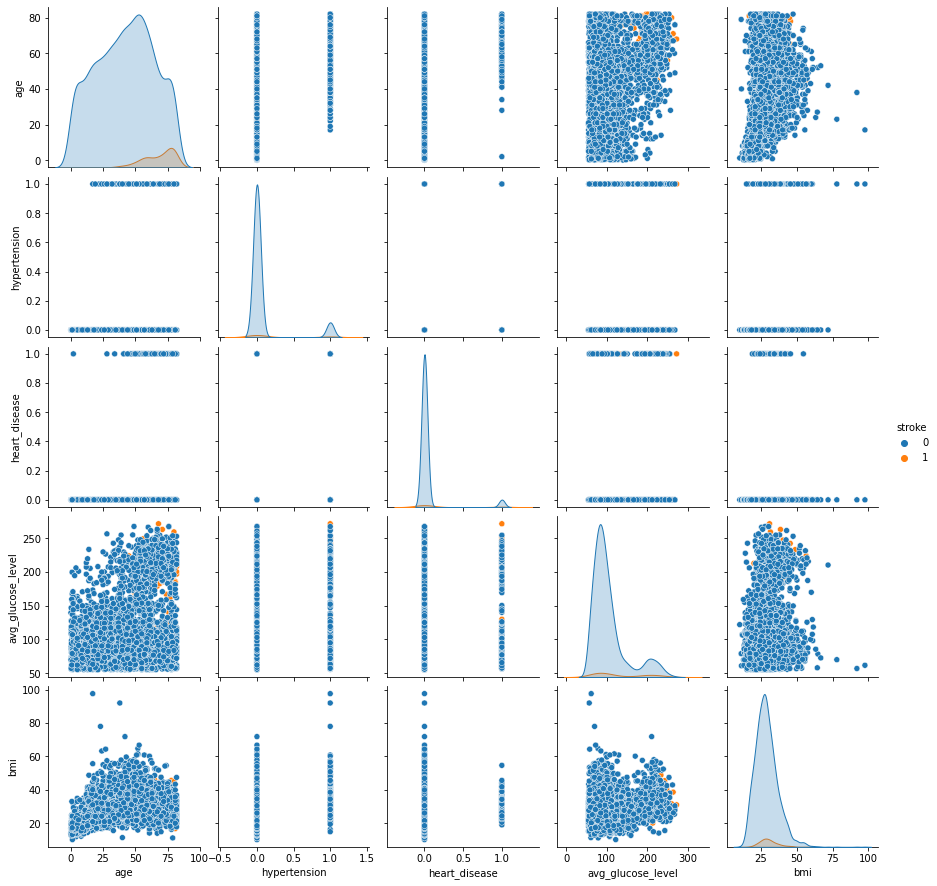

In [3]:
sns.pairplot(df,height = 2.5, hue='stroke')

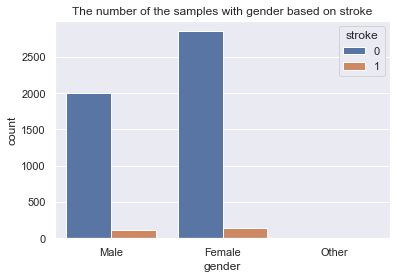

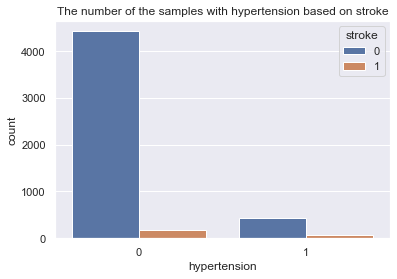

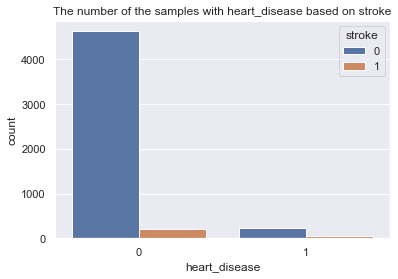

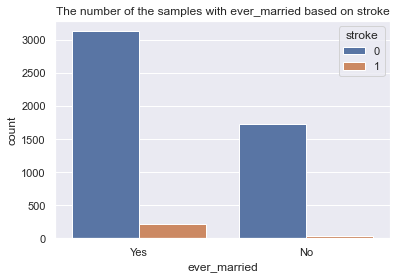

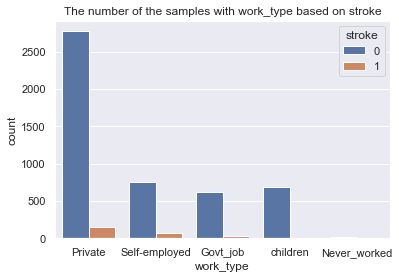

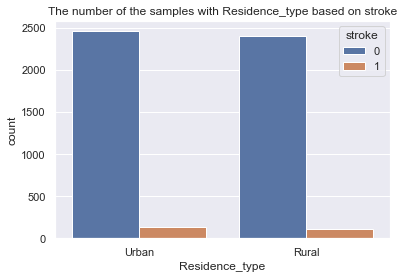

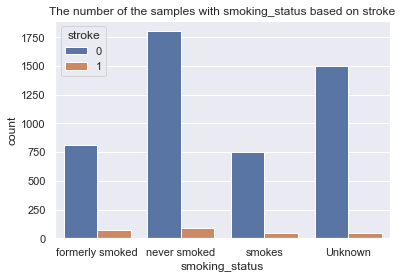

In [4]:
# a short look into the number of each categorical features grouped by stroke variable.
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]:  # exclude stroke column
    if (df[i].dtype == 'object') or (df[i].dtype == 'int64'):
            sns.countplot(data = df, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

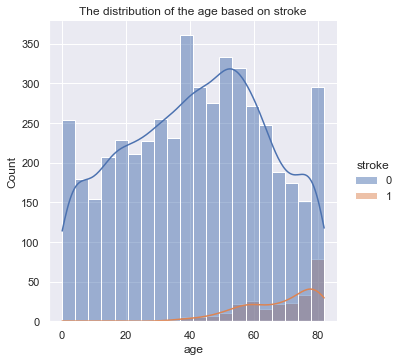

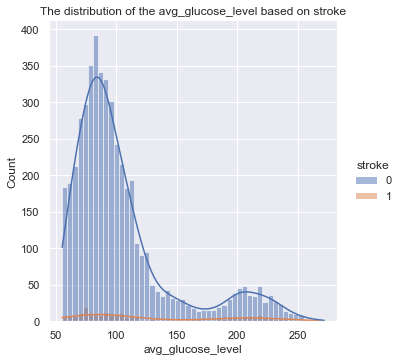

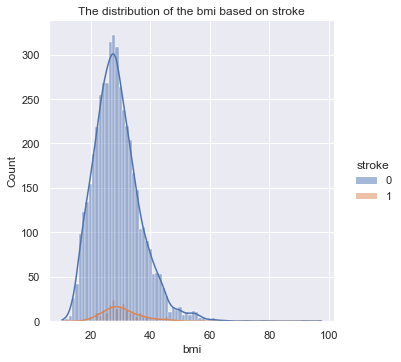

In [5]:
# a short look into numeric variables like bmi, avg_glucose_level and age
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]: # exclude stroke column
    if df[i].dtype == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(i))
            plt.show()

<AxesSubplot:>

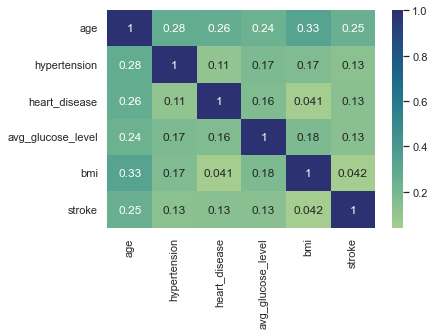

In [6]:
# Correlation heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'crest')

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

lb = LabelBinarizer()
label_encoder = LabelEncoder()
df['gender'] = lb.fit_transform(df['gender']) # male = 0 female = 1
df['ever_married'] = lb.fit_transform(df['ever_married']) # no = 0 yes = 1
df['work_type'] = label_encoder.fit_transform(df['work_type']) # private = 2 self = 3 gov = 0 child = 1
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type']) # urban = 1 rural = 0 
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status']) # formerly = 1 never = 2 regular = 3 unknown = 0
df.dropna(inplace=True)

df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,1,228.69,36.6,1,1
2,0,80.0,0,1,1,2,0,105.92,32.5,2,1
3,1,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1,79.0,1,0,1,3,0,174.12,24.0,2,1
5,0,81.0,0,0,1,2,1,186.21,29.0,1,1
6,0,74.0,1,1,1,2,0,70.09,27.4,2,1
7,1,69.0,0,0,0,2,1,94.39,22.8,2,1
9,1,78.0,0,0,1,2,1,58.57,24.2,0,1
10,1,81.0,1,0,1,2,0,80.43,29.7,2,1
11,1,61.0,0,1,1,0,0,120.46,36.8,3,1


In [8]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

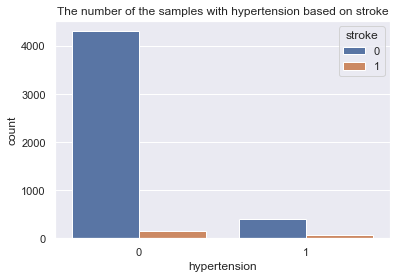

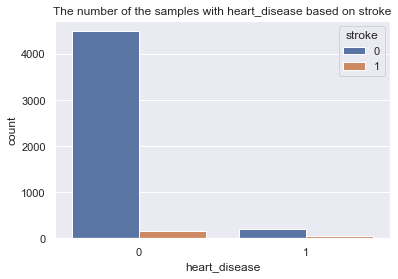

In [9]:
# visualization after SMOTE
df_as = pd.concat([X, y], axis = 1)

# a short look into the number of each categorical features grouped by stroke variable.
sns.set_theme(style = 'darkgrid')
for i in df_as.columns[:-1]:  # exclude stroke column
    if (df_as[i].dtype == 'object') or (df_as[i].dtype == 'int64'):
            sns.countplot(data = df_as, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

## Get the data ready 
### 80% Train data
### 20% Test data 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report


In [11]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state =25)

In [12]:
model = RandomForestClassifier(random_state = 40)

model.fit(train_X, train_y)

RandomForestClassifier(random_state=40)

In [13]:
model.score(train_X,train_y)

1.0

In [14]:
model.score(val_X,val_y)

0.9572301425661914

In [15]:
list(val_X)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [16]:
rfc = RandomForestClassifier()

In [17]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [18]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(train_X,train_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [19]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [20]:
display(cv)

Best parameters are: {'max_depth': None, 'n_estimators': 50}


0.958 + or -0.0 for the {'max_depth': 2, 'n_estimators': 5}
0.958 + or -0.0 for the {'max_depth': 2, 'n_estimators': 10}
0.958 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.958 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.958 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.957 + or -0.001 for the {'max_depth': 4, 'n_estimators': 5}
0.958 + or -0.0 for the {'max_depth': 4, 'n_estimators': 10}
0.958 + or -0.0 for the {'max_depth': 4, 'n_estimators': 50}
0.958 + or -0.0 for the {'max_depth': 4, 'n_estimators': 100}
0.958 + or -0.0 for the {'max_depth': 4, 'n_estimators': 250}
0.956 + or -0.003 for the {'max_depth': 8, 'n_estimators': 5}
0.955 + or -0.002 for the {'max_depth': 8, 'n_estimators': 10}
0.957 + or -0.001 for the {'max_depth': 8, 'n_estimators': 50}
0.957 + or -0.001 for the {'max_depth': 8, 'n_estimators': 100}
0.957 + or -0.001 for the {'max_depth': 8, 'n_estimators': 250}
0.949 +

In [21]:
model.score(train_X,train_y)

1.0

In [30]:
model.score(val_X,val_y)

0.9922655

In [16]:
gen = float(input("gender (enter 0 for male and 1 for female): "))
age = float(input("age: "))
hyp = float(input("ever had hypertension? (enter 0 for no 1 for yes): "))
hear = float(input("ever had heart disease? (enter 0 for no 1 for yes): "))
mar = float(input("ever married? (enter 0 for no 1 for yes): "))
work = float(input("what is your work type? (enter 0 for government 1  2 for private 3 for self employed):"))
res = float(input("enter your residance (enter 0 for rural 1 for urban): "))
gl = float(input("enter your glucose level: "))
bm = float(input("enter your bmi: "))
sm = float(input("do u smoke? (enter 1 for formerly 2 for never 3 for regular): "))

data_input = [[gen, age, hyp, hear, mar, work, res, gl, bm, sm]]

res =model.predict(data_input)
print(res)
if res ==1:
    print("predicting chances of stroke")
else:
    print("predicting chances of stroke")

gender (enter 0 for male and 1 for female): 1
age: 67
ever had hypertension? (enter 0 for no 1 for yes): 0
ever had heart disease? (enter 0 for no 1 for yes): 1
ever married? (enter 0 for no 1 for yes): 1
what is your work type? (enter 0 for government 1  2 for private 3 for self employed):2
enter your residance (enter 0 for rural 1 for urban): 1
enter your glucose level: 229
enter your bmi: 36
do u smoke? (enter 1 for formerly 2 for never 3 for regular): 1
[1]
predicting chances of stroke


C:\Users\yuvar\OneDrive\Desktop\ML\ML1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# import pickle

In [ ]:
# pickle.dump(model,open('randomforest_stroke_analysis.pkl','wb'))